In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential,load_model
from keras.layers import Dense,Reshape,advanced_activations,Dropout
from keras.regularizers import l2, activity_l2
from keras.constraints import nonneg
import numpy as np
%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime
from sklearn import cluster, datasets, metrics

0    56.633973
dtype: float64
0    7.332693
dtype: float64
[array([45, 55, 65])] [array([ 2.25,  2.25,  5.  ,  5.  ,  2.25])] [array([ 4.,  4.])] [array([ 2.25,  1.  ]), array([ 5.,  6.])]


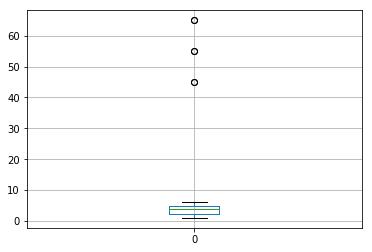

In [62]:
po=[1,2,1,2,4,3,3,4,1,5,4,4,6,3,2,1,6,2,5,4,3,4,5,3,4,5,3,45,55,65]
podf=pd.DataFrame(po)
print podf.mean()+podf.std()*3
print podf.kurt()
podf.boxplot()


_, bp = pd.DataFrame.boxplot(podf, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]


print outliers,boxes,medians,whiskers

0    54.90819
dtype: float64
0    8.063747
dtype: float64


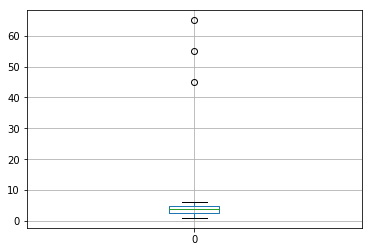

In [60]:
op=[1,2,1,2,4,3,3,4,1,5,4,4,6,3,2,1,6,2,5,4,3,5,5,4,5,3,4,5,3,45,55,65]
podf=pd.DataFrame(op)
# podf
print podf.mean()+podf.std()*3
print podf.kurt()
podf.boxplot()

In [32]:
#### import sys
# default_stdout = sys.stdout
# default_stderr = sys.stderr
# reload(sys)

# sys.stdout = default_stdout
# sys.stderr = default_stderr
# sys.setdefaultencoding('utf-8')

In [33]:
np.random.seed(5)

In [38]:
# 小樣本測試

# dtgh=pd.read_csv('fixtime.csv').copy()

# dtgh.columns=['a','b','c','d','e','f','g','h','i','j','k','l']
# dtgh['dt'] = dtgh.f+" "+dtgh.g

# dtgh.index = pd.to_datetime(dtgh['dt']);dtgh
# dtgh=dtgh.resample('H').last().fillna(np.nan);dtgh

# dtgh.a =dtgh.a.bfill();dtgh
# dtgh.b =dtgh.b.bfill();dtgh
# dtgh.c =dtgh.c.bfill();dtgh
# dtgh.d =dtgh.d.bfill();dtgh
# dtgh.e =dtgh.e.bfill();dtgh

# dtgh['dt'] = dtgh.index;dtgh

# dtgh['YY'] = dtgh['dt'].dt.strftime('%Y').astype('int32')-2000
# dtgh['dt'] = dtgh['dt'].dt.strftime('%Y-%m-%d %H:%M:%S')
# dtgh['fakeornot'] = dtgh.f.where(dtgh.f,0);dtgh
# dtgh['fakeornot'] = dtgh['fakeornot'].where(dtgh['fakeornot']==0,1);dtgh


# dtgh.f =dtgh.dt.str.split(' ',expand=True).ix[:,0];dtgh
# dtgh.g =dtgh.dt.str.split(' ',expand=True).ix[:,1];dtgh

# dtgh.h=dtgh.h.interpolate();dtgh
# dtgh.i=dtgh.i.interpolate();dtgh
# dtgh.j=dtgh.j.interpolate();dtgh
# dtgh.k=dtgh.k.interpolate();dtgh

# dtgh=dtgh.reset_index(drop=True)
# dtgh.drop('dt',axis =1)

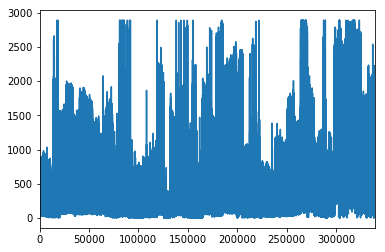

In [3]:
dfnh = pd.read_csv('nh.csv')
dfnhc =dfnh.copy()

alweneed =(dfnhc['當量'].mean()+(dfnhc['當量'].std())*4)
dfnhc['當量'].where(dfnhc['當量']<=alweneed,alweneed, inplace=True)
dfnhc['平均車間距'].where(dfnhc['平均車間距']>=0.0,0.0, inplace=True)
dfnhc['當量'].plot()

In [85]:
94.21*0.28+0.49*94.1+92.92*0.23

93.8594

In [4]:
# K-means 前準備

dfnhcg=dfnhc.groupby(['VD編號','方向']);
dfnhcgg=dfnhcg.head(168).groupby(['VD編號','方向']);
dfnhcggm=pd.DataFrame(dfnhcgg['當量'].mean().copy());
# dfnhcggm.plot()
dfnhcggms=dfnhcggm.sort_values('當量').reset_index().copy();
# dfnhcggms.plot()
eqlist =dfnhcggms['當量'].astype('int32').values.tolist()

indexlist =dfnhcggms.index.tolist()
# indexlist
Temp = []
for ele in range(len(indexlist)):
    Temp.append([indexlist[ele],eqlist[ele]])
X = np.array(Temp);

kmeans = cluster.KMeans(n_clusters = 2).fit(X)
# K-means 分群結果,共八群
dfnhcggms['label']=kmeans.labels_;
#看K-means有幾群
set(dfnhcggms.label)


{0, 1}

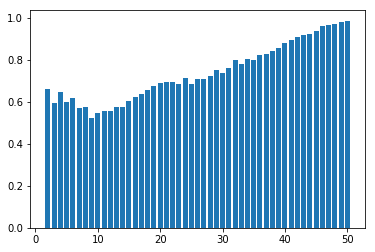

[0.65845927354975287, 0.59506039132567001, 0.64440503605026622, 0.59927378415986488, 0.61883240735261247, 0.569469905399976, 0.57520523631563847, 0.52146148722012675, 0.54550112652978133, 0.55520577851222486, 0.55372970463971016, 0.57638756352708742, 0.57283902889547123, 0.6046372670792749, 0.62226314663190097, 0.63843015660850511, 0.65735953136124869, 0.67569608763799005, 0.68792704614954814, 0.69187929754174327, 0.69218417835951307, 0.68582525623314761, 0.71098046120003577, 0.68260180417021876, 0.70584559071195818, 0.7076131418357976, 0.72119076630950518, 0.75124539520235467, 0.73845897460471677, 0.76103293654401005, 0.79668875787262283, 0.77715676508957077, 0.80130431990531259, 0.79602912064067355, 0.82339568926018658, 0.82487160573981699, 0.84153481230133509, 0.85568244257679349, 0.87917753071966909, 0.893003218920841, 0.90930357404552242, 0.9160289898857451, 0.92309974808419415, 0.93545631627421666, 0.95781410210235896, 0.96566410989714513, 0.97081995867644144, 0.97666286644164924

In [5]:
# K means 分群績效

silhouette_avgs = []
ks = range(2,51)

for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 50 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [6]:
vdlistd= dfnhcggms.set_index(['VD編號','方向']).index.tolist()

dfvdd=pd.DataFrame(vdlistd,columns=['a','b']);dfvdd['c']=dfvdd.index;dfvdd
dfvdd['d'] = dfnhcggms['label']
dfvdd1=dfvdd.set_index(['a','b']);

In [7]:
dfnhcri=dfnhc.set_index(['VD編號','方向']);
dfnhcri['sortby'] = None
dfnhcri['label']= None
dfvdd1
Y1 = dfnhcri['label']
x1 = dfnhcri['sortby']
Y2 = dfvdd1['d']
x2 = dfvdd1['c']
Y1.update(Y2)
x1.update(x2)
dfnhcri['sortby']=x1.values
dfnhcri['label']=Y1.values
dfnhcris=dfnhcri.sort_values(['sortby','日期']);
dfnhcris

道路                 位置  道路數          日期        時間          當量  \
VD編號    方向                                                                     
VQKWL60 東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  00:00:00     5.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  01:00:00    12.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  02:00:00     1.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  03:00:00     2.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  04:00:00     1.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  06:00:00     4.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  07:00:00    12.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  08:00:00    48.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  09:00:00    60.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  10:00:00    75.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  11:00:00    43.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  12:00:00   107.28813   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  13:00:00    28.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  14:00:00    35.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  15:00:00    68.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  16:00:00    50.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  17:00:00    60.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  18:00:00    57.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  19:00:00    26.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  20:00:00    19.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  21:00:00    13.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  22:00:00    12.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-01  23:00:00     8.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  00:00:00     1.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  01:00:00     1.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  02:00:00     7.50000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  03:00:00     2.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  05:00:00     2.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  06:00:00     3.00000   
        東   民權東路六段  民權東路六段(防災科學教育館對面)    2  2016-04-02  07:00:00     5.00000   
...            ...                ...  ...         ...       ...         ...   
V6120C0 東     麥帥二橋               市民麥二    2  2017-01-11  18:00:00  1834.50000   
        東     麥帥二橋               市民麥二    2  2017-01-11  19:00:00  2352.01730   
        東     麥帥二橋               市民麥二    2  2017-01-11  20:00:00  2152.67770   
        東     麥帥二橋               市民麥二    2  2017-01-11  21:00:00  1932.53440   
        東     麥帥二橋               市民麥二    2  2017-01-11  22:00:00  2087.00000   
        東     麥帥二橋               市民麥二    2  2017-01-11  23:00:00  1774.66100   
        東     麥帥二橋               市民麥二    2  2017-01-12  00:00:00   963.55930   
        東     麥帥二橋               市民麥二    2  2017-01-12  01:00:00   625.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  02:00:00   480.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  03:00:00   346.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  04:00:00   279.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  05:00:00   346.00000   
        東     麥帥二橋               市民麥二    2  2017-01-12  06:00:00   405.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  07:00:00   868.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  08:00:00  1956.50000   
        東     麥帥二橋               市民麥二    2  2017-01-12  09:00:00  2109.18650   
        東     麥帥二橋               市民麥二    2  2017-01-12  10:00:00  2304.00000   
        東     麥帥

In [8]:
#把群跟群分開
labelist=dfnhcris.label.unique().tolist(); labelist
dictfftf={}
labelist.sort()
for eje in labelist:
    dictfftf['cluster{}'.format(eje)]=dfnhcris.where(dfnhcris.label == eje).dropna()
    

In [9]:

sortlist = dictfftf[dictfftf.keys()[0]].sortby.unique().tolist(); sortlist

dictvd = {}

sortlist.sort()
for ede in sortlist:
    dictvd['cluster{}'.format(ede)]=dictfftf[dictfftf.keys()[0]].where(dictfftf[dictfftf.keys()[0]].sortby == ede).dropna()

In [10]:
def clean(inp):
    
    
    outp = inp.ix[:,[12,1,4,5,6,8,9,10,7]].copy()
    outp.columns = ['a','b','c','d','e','f','g','h','i'];outp
    
    outp['dt'] = outp.d+" "+outp.e

    outp.index = pd.to_datetime(outp['dt']);outp
    outp=outp.resample('H').last().fillna(np.nan);outp

    outp.a =outp.a.bfill();outp
    outp.b =outp.b.bfill();outp
    outp.c =outp.c.bfill();outp
   

    outp['dt'] = outp.index;outp
    outp['YY'] = outp['dt'].dt.strftime('%Y').astype('int32')-2000
    outp['dt'] = outp['dt'].dt.strftime('%Y-%m-%d %H:%M:%S')
    outp['fakeornot'] = outp.d.where(outp.d,0);outp
    outp['fakeornot'] = outp['fakeornot'].where(outp['fakeornot']==0,1);outp


    outp.d =outp.dt.str.split(' ',expand=True).ix[:,0];outp
    outp.e =outp.dt.str.split(' ',expand=True).ix[:,1];outp

    outp.f=outp.f.interpolate();outp
    outp.g=outp.g.interpolate();outp
    outp.h=outp.h.interpolate();outp
    outp.i=outp.i.interpolate();outp
    outp=outp.reset_index(drop=True)
    outp=outp.drop('dt',axis =1)

    
    
    outp.i=outp.i/10;outp
    outp.h=outp.h/10;outp
    outp.replace(to_replace='東',value=1,inplace=True );outp
    outp.replace(to_replace='西',value=2,inplace=True );outp
    outp.replace(to_replace='南',value=3,inplace=True );outp
    outp.replace(to_replace='北',value=4,inplace=True );outp
    outp.d = pd.to_datetime(outp.d);
    outp['weekday'] = outp['d'].dt.dayofweek;outp

    outp.d= outp.d.dt.dayofyear;outp
    outp.replace(to_replace='00:00:00',value=0,inplace=True );outp
    outp.replace(to_replace='01:00:00',value=1,inplace=True );outp
    outp.replace(to_replace='02:00:00',value=2,inplace=True );outp
    outp.replace(to_replace='03:00:00',value=3,inplace=True );outp
    outp.replace(to_replace='04:00:00',value=4,inplace=True );outp
    outp.replace(to_replace='05:00:00',value=5,inplace=True );outp
    outp.replace(to_replace='06:00:00',value=6,inplace=True );outp
    outp.replace(to_replace='07:00:00',value=7,inplace=True );outp
    outp.replace(to_replace='08:00:00',value=8,inplace=True );outp
    outp.replace(to_replace='09:00:00',value=9,inplace=True );outp
    outp.replace(to_replace='10:00:00',value=10,inplace=True );outp
    outp.replace(to_replace='11:00:00',value=11,inplace=True );outp
    outp.replace(to_replace='12:00:00',value=12,inplace=True );outp
    outp.replace(to_replace='13:00:00',value=13,inplace=True );outp
    outp.replace(to_replace='14:00:00',value=14,inplace=True );outp
    outp.replace(to_replace='15:00:00',value=15,inplace=True );outp
    outp.replace(to_replace='16:00:00',value=16,inplace=True );outp
    outp.replace(to_replace='17:00:00',value=17,inplace=True );outp
    outp.replace(to_replace='18:00:00',value=18,inplace=True );outp
    outp.replace(to_replace='19:00:00',value=19,inplace=True );outp
    outp.replace(to_replace='20:00:00',value=20,inplace=True );outp
    outp.replace(to_replace='21:00:00',value=21,inplace=True );outp
    outp.replace(to_replace='22:00:00',value=22,inplace=True );outp
    outp.replace(to_replace='23:00:00',value=23,inplace=True );outp
    cols =outp.columns.tolist()
    outp= outp[cols[:3]+cols[-3:]+cols[3:-3]];outp
#     outp.columns = ['a','b','c','d','e','f','g','h','i','j','k','l'];outp
    outpp = outp.values
    outpp = outpp.astype('float32')
    
#     if len(outpp)%168 == 0:
    train_size = int(len(outpp) * 0.75)
    test_size = len(outpp) - train_size
    train, test = outpp[0:train_size,:], outpp[train_size:len(outpp),:]
    if (len(train)%168 != 0) or (len(test)%168 != 0) :
        train=train[:-(len(train)%168)]
        test=test[:-(len(test)%168)]
        
        
        
#     else :
#         train_size = int(len(outpp[:-(len(outpp)%168)]) * 0.75)
#         test_size = len(outpp[:-(len(outpp)%168)]) - train_size
#         train, test = outpp[:-(len(outpp)%168)][0:train_size,:], outpp[:-(len(outpp)%168)][train_size:len(outpp),:]
        

    return train, test
#     return outp
    
    

In [11]:

tralist = []
teslist = []
for geg in dictvd.keys():
    temptra,temptes=clean(dictvd[geg].reset_index())
    #train
    for ele in temptra.tolist():
        tralist.append(ele)
    #test
    for ele3 in temptes.tolist():
        teslist.append(ele3)

cluster01tra=np.array(tralist)
print len(cluster01tra)
cluster01tes=np.array(teslist)
print len(cluster01tes)


/Users/Jackie/anaconda/lib/python2.7/site-packages/pandas/core/missing.py:43: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  mask = arr == x


131040
43680


In [77]:
43680%168

0

In [12]:
import time
start = time.time()

#do stuff




# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:nort]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, nort-1])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)

# 沒有車間劇=9有就是10
nort = 12
# magic number
look_back = 168
# cut off remainder
train = cluster01tra
test = cluster01tes
# check data lenth when cut off remainder
print(len(train), len(test))

# seperate data to input"X" and output"Y"
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
    
# create and fit Multilayer Perceptron model
model = Sequential()

# RESHAPE is  working !!!!! >0<"
model.add(Reshape((look_back*nort,), input_shape=(look_back,nort)))
# Add layers to neruon network
model.add(Dense(190,input_dim=(look_back*nort), activation='relu'))
model.add(Dense(256, init='uniform', activation='relu'))
model.add(Dense(look_back, W_constraint=nonneg()))
model.compile(loss='mape', optimizer='adam')

model.fit(trainX, trainY, nb_epoch=168, batch_size=3, verbose=0)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MAPE ' % trainScore)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MAPE ' % testScore)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    

print(start - time.time()),'seconds'

(131040, 43680)
Train Score: 15.35 MAPE 
Test Score: 121.49 MAPE 
-455.186255932 seconds


In [13]:
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

961.752
934.849579353
514.627
612.83461426


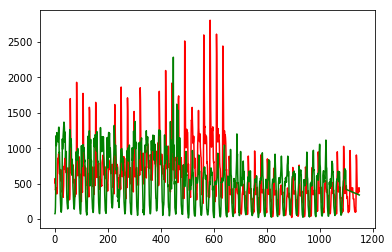

In [14]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

pre = testPredict.reshape(len(testPredict)*len(testPredict[0]),)*10
ori = testY.reshape(len(testY)*len(testY[0]),)*10

print pre.mean()
print ori.mean()
print pre.std()
print ori.std()


# plt.ylabel(u'當量', fontsize=30)
# plt.xlabel(u'時間', fontsize=30)

plt.plot(pre[41350:42500],color='r')
# plt.plot(pre[-672:-336],color='b')
# plt.plot(pre[-1008:-672],color='r')
# plt.plot(pre[-1344:-1008],color='g')

plt.plot(ori[41350:42500],color='g')
# plt.savefig('0216.jpg')

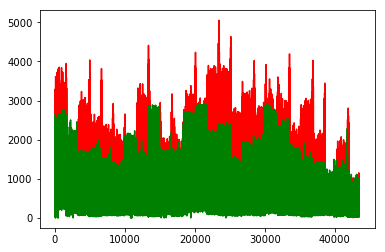

In [81]:
plt.plot(pre,color='r')
plt.plot(ori,color='g')

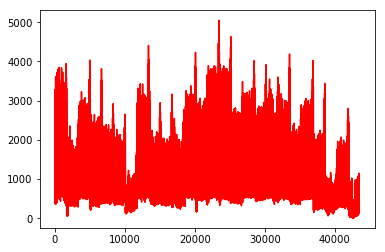

In [82]:
plt.plot(pre,color='r')